In [1]:
import gauss_decomp as gdc
import numpy as np
from astropy.io import fits
import os
import matplotlib.pyplot as plt
from matplotlib import colors
from iris_lmsalpy import extract_irisL2data as ei
from scipy.io import readsav
from iris_lmsalpy import saveall as sv
from scipy.stats import spearmanr
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob

In [11]:
os.environ['sim_dir']='/Users/souvikb/various_analysis/GaussSep/pl072050_sim/'
B_files = np.load(os.path.join(os.environ['sim_dir'], 'pl072050_B.npz'))
heating_proxy = np.load(os.path.join(os.environ['sim_dir'], 'pl072050_integ_Q_per_rho.npz'))
heating_proxy.files

['integrated_q_per_part']

In [18]:
Bx_sim = B_files['Bx'][:,:,0]
By_sim = B_files['By'][:,:,0]
Bz_sim = B_files['Bz'][:,:,0]
heat_per_part = heating_proxy['integrated_q_per_part']

In [19]:
Bx_sim.shape

(1440, 1440)

## PTD and Gauss Separation

In [20]:
#------------------------------
# Do PTD, to get toroidal component of horizontal field 
Btx_sim,Bty_sim,Bpx_sim,Bpy_sim,Tsim,dPdz_sim,P_sim,bx_mean_sim,by_mean_sim,bz_mean_sim = \
gdc.ptd_fft_2d( Bx_sim, By_sim, Bz_sim)

In [21]:
#------------------------------
# Do Gauss Sep
Bltx_sim, Blty_sim, Bltz_sim, psilt_sim, \
Bgtx_sim, Bgty_sim, Bgtz_sim, psigt_sim, \
Bx_mean_sim, By_mean_sim, Bz_mean_sim = \
gdc.gauss_sep( Bx_sim, By_sim, Bz_sim)

Text(0.5, 1.0, '$\\vec{B}^{>}(x, y, 0)$ due to $\\vec{J}^{>}$')

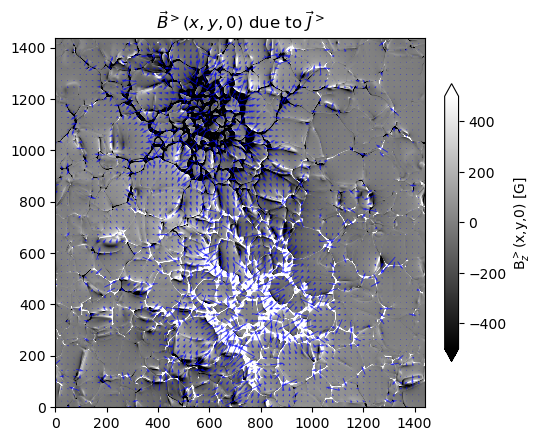

In [23]:
ny, nx = Bgtx_sim.shape
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
plt.imshow(Bgtz_sim, origin='lower', cmap='gray',interpolation='none',vmax=500,vmin=-500)
# plt.contour(Bz0_obs, levels=[1], colors='black')
plt.colorbar(label='B$^{>}_{z}$(x,y,0) [G]', fraction=0.028, pad=0.04,extend='both')
plt.quiver(
    x[::24, ::24], y[::24, ::24],
    Bgtx_sim[::24, ::24], Bgty_sim[::24, ::24],
    scale=2e4, color='blue', pivot='mid',alpha=0.7
)
plt.title(r'$\vec{B}^{>}(x, y, 0)$ due to $\vec{J}^{>}$')

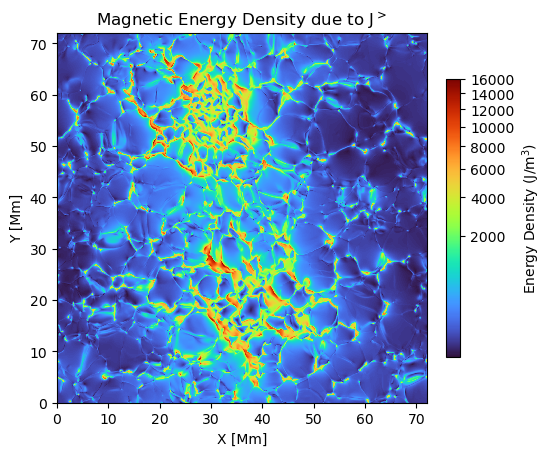

In [53]:
## Calculating the magnetic energy density >0
Bgtx_SI = Bgtx_sim * 1e-4  # Convert to Tesla
Bgty_SI = Bgty_sim * 1e-4
Bgtz_SI = Bgtz_sim * 1e-4
mu_0 = 1.257e-6 # Permeability of free space in T*m/A
B_energy_density_gt = 0.5 * (Bgtx_SI**2 + Bgty_SI**2 + Bgtz_SI**2) / mu_0
plt.imshow(B_energy_density_gt, origin='lower', cmap='turbo', interpolation='none',norm=colors.PowerNorm(0.4,vmax=16e3),
           extent=[0,0.05*Bgtx_sim.shape[0],0,0.05*Bgtx_sim.shape[1]])
plt.colorbar(label='Energy Density (J/m$^3$)', fraction=0.028, pad=0.04)
plt.title('Magnetic Energy Density due to J$^{>}$')
plt.xlabel('X [Mm]')
plt.ylabel('Y [Mm]')
plt.savefig(os.path.join(os.environ['sim_dir'], 'sim_B_gt_energy_density.png'), dpi=300, bbox_inches='tight')

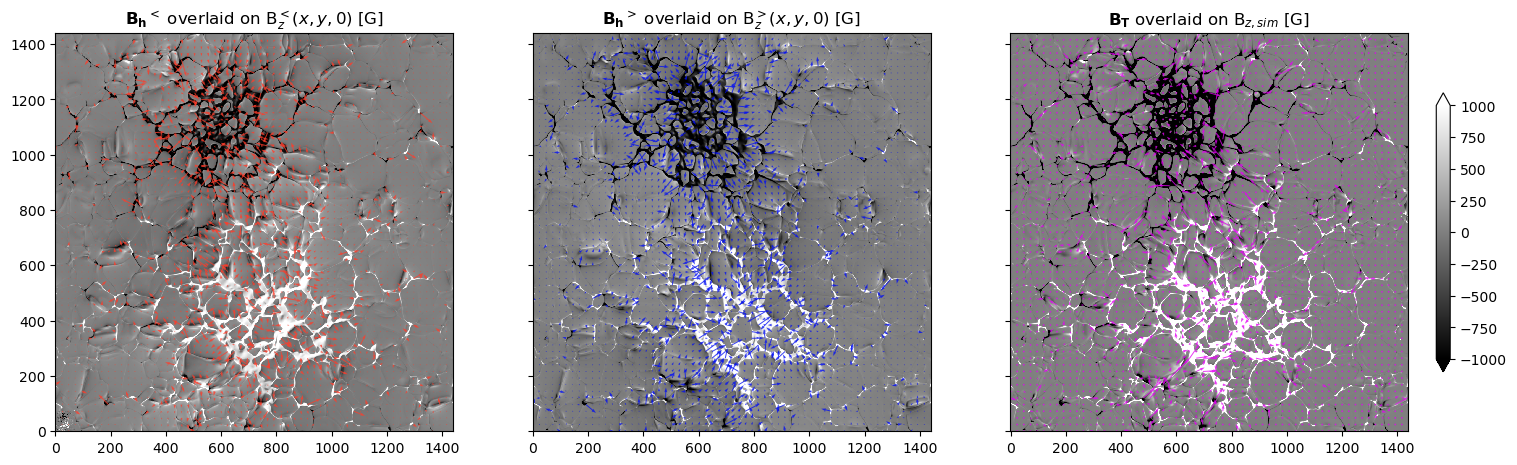

In [49]:
ny, nx = Bgtx_sim.shape
x, y = np.meshgrid(np.arange(nx), np.arange(ny))

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,6),sharex=True,sharey=True)
ax=ax.ravel()

ax[0].imshow(Bltz_sim, origin='lower', cmap='gray',interpolation='none',vmax=1000,vmin=-1000,
             )
ax[0].set_title(r'$\mathbf{B_h}^{<}$ overlaid on B$^{<}_{z}(x,y,0)$ [G]')
# ax.contour(Bz0_sim, levels=[1], colors='black')
fig.colorbar(ax[0].imshow(Bltz_sim, origin='lower', cmap='gray',interpolation='none',vmax=1000,vmin=-1000,
                          extent=[0,0.05*Bgtx_sim.shape[0],0,0.05*Bgtx_sim.shape[1]]), ax=ax,fraction=0.01, pad=0.02,
             extend='both')
ax[0].quiver(
    x[::24, ::24], y[::24, ::24],
    Bltx_sim[::24, ::24], Blty_sim[::24, ::24],
    scale=3e4, color='#FE3D2B',alpha=0.8
)
# plt.title(r'$\vec{B}^{>}(x, y, 0)$ due to $\vec{J}^{>}$')


ax[1].imshow(Bgtz_sim, origin='lower', cmap='gray',interpolation='none',vmax=1000,vmin=-1000,
             ) 
ax[1].set_title(r'$\mathbf{B_h}^{>}$ overlaid on B$^{>}_{z}(x,y,0)$ [G]')
# # ax[1].streamplot(x, y, Bltx_obs, Blty_obs, color="#EA0C0C", linewidth=1, density=1, arrowsize=1.5)
# ax[1].streamplot(x, y, Bgtx_obs, Bgty_obs, color="#030FF2", linewidth=1, density=1, arrowsize=1.5)
ax[1].quiver(
    x[::24, ::24], y[::24, ::24],
    Bgtx_sim[::24, ::24], Bgty_sim[::24, ::24],
    scale=3e4, color='#030FF2',alpha=0.8
)

ax[2].imshow(Bz_sim, origin='lower', cmap='gray',interpolation='none',vmax=1000,vmin=-1000,
             )
ax[2].set_title(r'$\mathbf{B_T}$ overlaid on B$_{z,sim}$ [G]')
# ax[2].quiver(
#     x[::24, ::24], y[::24, ::24],
#     Bgtx_sim[::24, ::24], Bgty_sim[::24, ::24],
#     scale=1e4, color='#030FF2',alpha=0.8
# )
# ax[2].imshow(Bz0_obs, origin='lower', cmap='gray',interpolation='none',vmax=500,vmin=-500)
# ax[2].set_title(r'$\mathbf{B_T}$ overlaid on B$_{z,obs}$ [G]')
ax[2].quiver(
    x[::24, ::24], y[::24, ::24],
    Btx_sim[::24, ::24], Bty_sim[::24, ::24],
    scale=3e4, color="#E203F2",alpha=0.8,minlength=2
)
# ax[2].streamplot(x, y, Btx_obs, Bty_obs, color="#2FF203", linewidth=1, density=1, arrowsize=1.5)
# plt.xlim([100, 600])
# plt.ylim([0,400])
plt.show()
fig.savefig(os.path.join(os.environ['sim_dir'], 'Sim_B_and_their_quiver_vectors.png'), dpi=300, bbox_inches='tight')


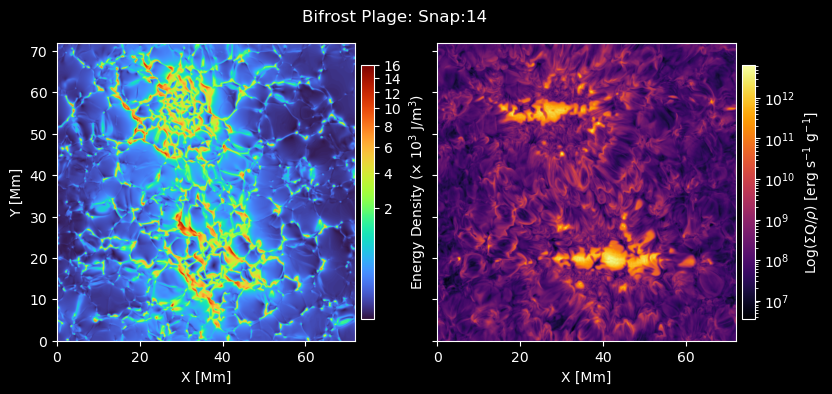

In [102]:
from scipy.ndimage import gaussian_filter
sigma_phys = 0.18 *725/2.355 # From Suematsu et al. 2007. Changing to gaussian sigma hence dividing by 2.335
sim_pix = 50 ##Numerical resolution of the simulation
factor =sigma_phys / sim_pix
convolved_energy_density_gt  = gaussian_filter(B_energy_density_gt, sigma=(factor, factor))
convolved_heat_per_part = gaussian_filter(heat_per_part, sigma=(factor, factor))
plt.style.use('dark_background')
fig, ax = plt.subplots(nrows=1,ncols=2,sharex=True,sharey=True,figsize=(9,4.5))
ax = ax.ravel()
im= ax[0].imshow(convolved_energy_density_gt*1e-3, origin='lower', cmap='turbo',norm=colors.PowerNorm(0.4,vmax=16),
           extent=[0,0.05*Bgtx_sim.shape[0],0,0.05*Bgtx_sim.shape[1]])
plt.colorbar(im, label=r'Energy Density ($\times $ 10$^{3}$ J/m$^3$)',fraction=0.04,pad=0.02)
ax[0].set_xlabel('X [Mm]')
ax[0].set_ylabel('Y [Mm]')

im = ax[1].imshow(convolved_heat_per_part,origin='lower', norm=colors.LogNorm(),cmap='inferno',
             extent=[0,0.05*Bgtx_sim.shape[0],0,0.05*Bgtx_sim.shape[1]],)
plt.colorbar(im, label=r'Log($\Sigma$Q/$\rho$) [erg s$^{-1}$ g$^{-1}$]',fraction=0.04,pad=0.02)
ax[1].set_xlabel('X [Mm]')
plt.suptitle('Bifrost Plage: Snap:14',y=0.9)
fig.savefig(os.path.join(os.environ['sim_dir'], 'dark_sim_density_gt_and_Q.png'), dpi=300, bbox_inches='tight')

## Statistical Analysis

In [119]:
# np.nanpercentile(np.abs(Bz_sim), [50,70,85,95])
b_bins = [(15, 100), (100, 500), (500, 1000), (1000,1500), (1500, np.round(np.max(np.abs(Bz_sim))))]
# np.nanpercentile(np.abs(Bz_sim), [50,70,85,95])

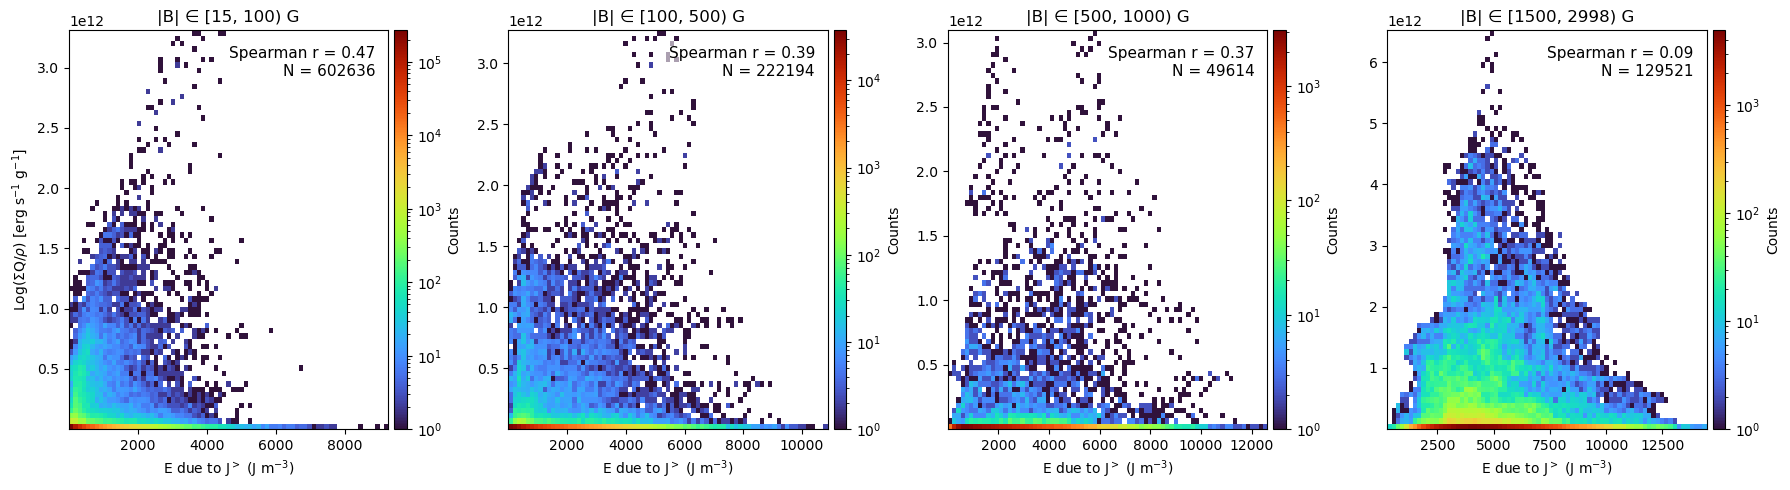

In [122]:
plt.style.use("default")

b_bins = [(15, 100), (100, 500), (500, 1000), (1500, np.round(np.max(np.abs(Bz_sim))))]

fig, ax = plt.subplots(1, len(b_bins), figsize=(18, 5))
ax = np.atleast_1d(ax)

for idx, (low, high) in enumerate(b_bins):
    axis = ax[idx]

    mask_B = ((np.abs(Bz_sim) >= low) & (np.abs(Bz_sim) < high)).astype(float)

    x = (convolved_energy_density_gt * mask_B).flatten()
    y = (convolved_heat_per_part * mask_B).flatten()

    valid = (~np.isnan(x)) & (~np.isnan(y)) & (y > 0)
    x_valid, y_valid = x[valid], y[valid]

    if len(x_valid) == 0:
        axis.set_visible(False)
        continue

    y_lim = np.nanpercentile(y_valid, 90)
    axis.set_ylim(0, y_lim)

    rho, _ = spearmanr(x_valid, y_valid)

    hist = axis.hist2d(
        x_valid,
        y_valid,
        bins=75,
        cmap="turbo",
        norm=colors.LogNorm(vmin=1),
    )

    axis.text(
        0.96,
        0.96,
        f"Spearman r = {rho:.2f}\nN = {len(x_valid)}",
        transform=axis.transAxes,
        ha="right",
        va="top",
        fontsize=11,
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"),
    )

    axis.set_title(f"|B| ∈ [{low}, {int(high) if np.isfinite(high) else '∞'}) G")
    axis.set_xlabel(r"E due to J$^{>}$ (J m$^{-3}$)")

    divider = make_axes_locatable(axis)
    cax = divider.append_axes("right", size="4%", pad=0.06)
    cbar = fig.colorbar(hist[-1], cax=cax)
    cbar.set_label("Counts")

ax[0].set_ylabel(r"Log($\Sigma$Q/$\rho$) [erg s$^{-1}$ g$^{-1}$]")
fig.tight_layout()
fig.savefig(os.path.join(os.environ['sim_dir'], 'stats_density_gt_and_Q.png'), dpi=300, bbox_inches='tight')
plt.show()
